# Linear Regression

Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 
Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. 
The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.
They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. 
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. 
It will be used by the management to understand how exactly the demands vary with different features. 
They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# The Steps that will be followed

    -Reading, Understanding and visualising the data
    -Preparing the data for the model(train, test split, rescaling)
    -Training the model
    -Residual Analysis
    -Predictions and Evaluations on the dataset.

# Step 1 - Reading, Understanding and visualising the data

In [1]:
#Import required Libraries to solve the problem

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.tsa.api as smt




#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
#import dataset

bike = pd.read_csv("/Users/Raja/Documents/Upgrad/Linear-Regression/day.csv")

#Metadata

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [3]:
bike.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Remove the data fields that doesnot add any value

#Casual/Registered - since we have this information as total to be predictive variable
#instant - since its an index, we can remove tis field as well
#dteday - since we have this information as individual fields, we can remove this field and also date cannot be used for linear regression models.

bike = bike.drop(['instant','dteday','casual','registered'],axis=1)

In [5]:
bike.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Explore the data

In [6]:
#Understand the total rows and columns
bike.shape

(730, 12)

In [7]:
##Understand basic statistical information
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [8]:
#Understanding the basic information and to see if there are any null values.
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.5 KB


Column WeatherSit and Season are mentioned as "1,2,.." and can be interpreted as ordered categorical variable.
However they are not, hence assigning these columns with the original string values and encode them while creating model.



# Univariant Analysis

    1. Numerical values analysis
    2. Categorical values analysis

    Listing all the numerical and categorical colums

In [9]:
num_vars = ['temp','atemp','windspeed','hum','cnt']
cat_vars = ['holiday','yr','weekday','workingday','mnth','season','weathersit']

In [10]:
#Visualising Numerical variables

bike_num = bike[num_vars]

In [11]:
bike_num.head()

,temp,atemp,windspeed,hum,cnt
0,14.110847,18.18125,10.749882,80.5833,985
1,14.902598,17.68695,16.652113,69.6087,801
2,8.050924,9.47025,16.636703,43.7273,1349
3,8.200000,10.60610,10.739832,59.0435,1562
4,9.305237,11.46350,12.522300,43.6957,1600


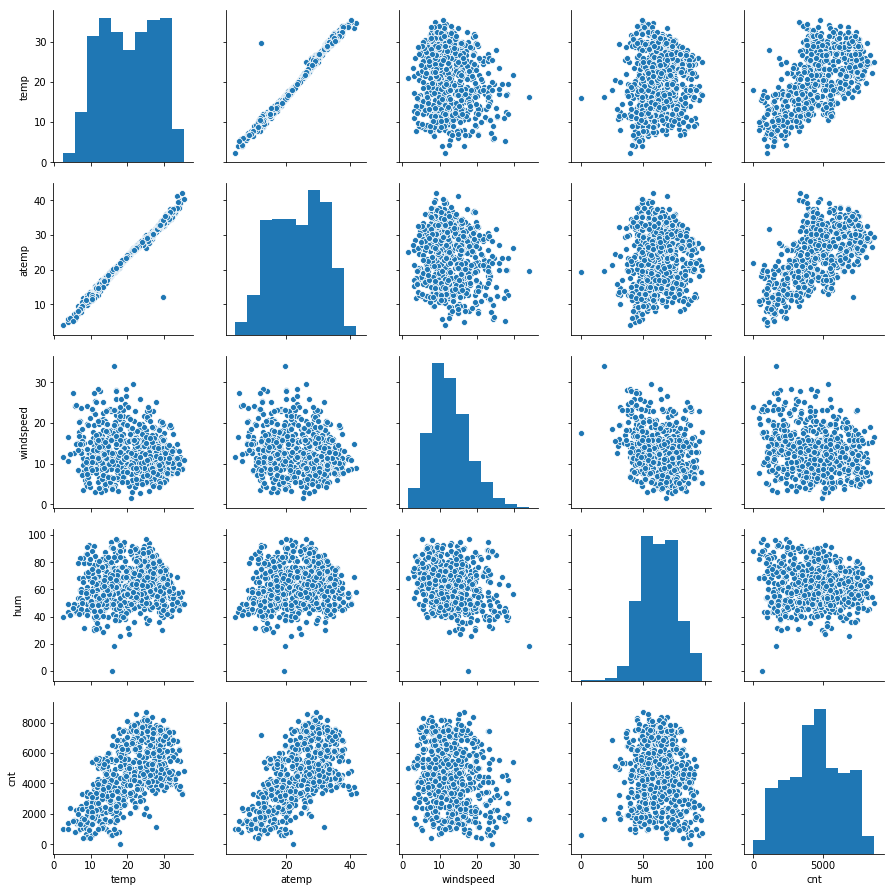

In [12]:
sns.pairplot(bike_num)
plt.show()

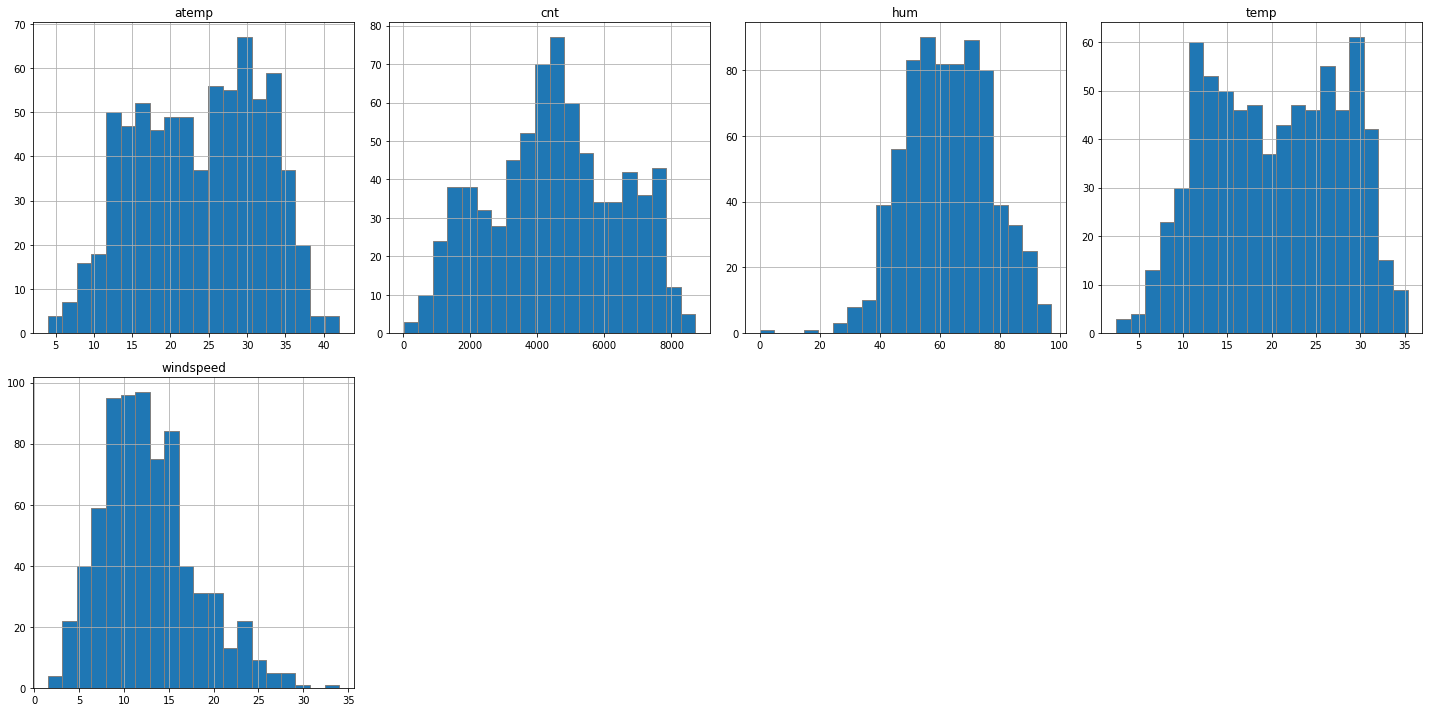

In [13]:
bike_num.hist(bins=20, figsize=(20, 10), layout=(-1, 4), edgecolor="gray")
plt.tight_layout() 

#Inferences

1. There is a linear relationship between temp and atemp with the predictor variable
2. Not many outliers are there, except a few for windspeed and humidity.

From the above and below plots we can see there are couple of outliers for humidity column

min: 0.0
max: 97.25


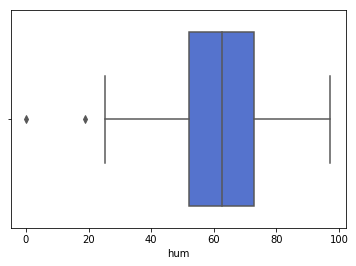

In [14]:
sns.boxplot(bike.hum, orient = "h", color = "royalblue");
print ("min:", bike.hum.min())
print ("max:", bike.hum.max())

IQR method to remove the outliers in annual income

In [15]:
print(bike.shape)
Q1 = bike.hum.quantile(0.25)
Q3 = bike.hum.quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)

# Remove Outliers
bike = bike[~((bike.hum < (Q1 - 1.5 * IQR)) |(bike.hum > (Q3 + 1.5 * IQR)))]
# Check shape again
print(bike.shape)

(730, 12)
IQR:  20.989575000000002
(728, 12)


min: 1.5002438999999999
max: 29.584721000000002


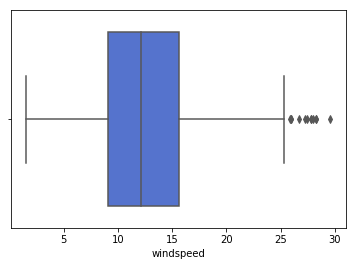

In [16]:
sns.boxplot(bike.windspeed, orient = "h", color = "royalblue");
print ("min:", bike.windspeed.min())
print ("max:", bike.windspeed.max())

# Categorical Variables

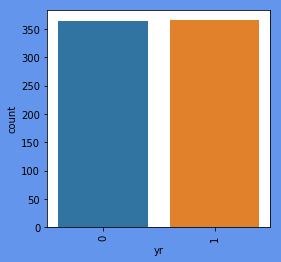

In [17]:
fig, ax1 = plt.subplots(figsize=(4, 4),facecolor='cornflowerblue')
sns.countplot(bike.yr)
plt.xticks(rotation=90)
plt.show()

There are equal number of records for each year

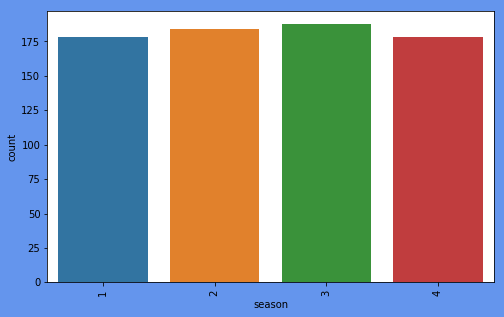

In [18]:
fig, ax1 = plt.subplots(figsize=(8, 5),facecolor='cornflowerblue')
sns.countplot(bike.season)
plt.xticks(rotation=90);

All the values are equally distributed and doesnot provide much insight. 
Since individual categorical variables are not providing much insight, we will analyse further on bivariant analysis with out target variable "CNT"


# Bivariant Analysis

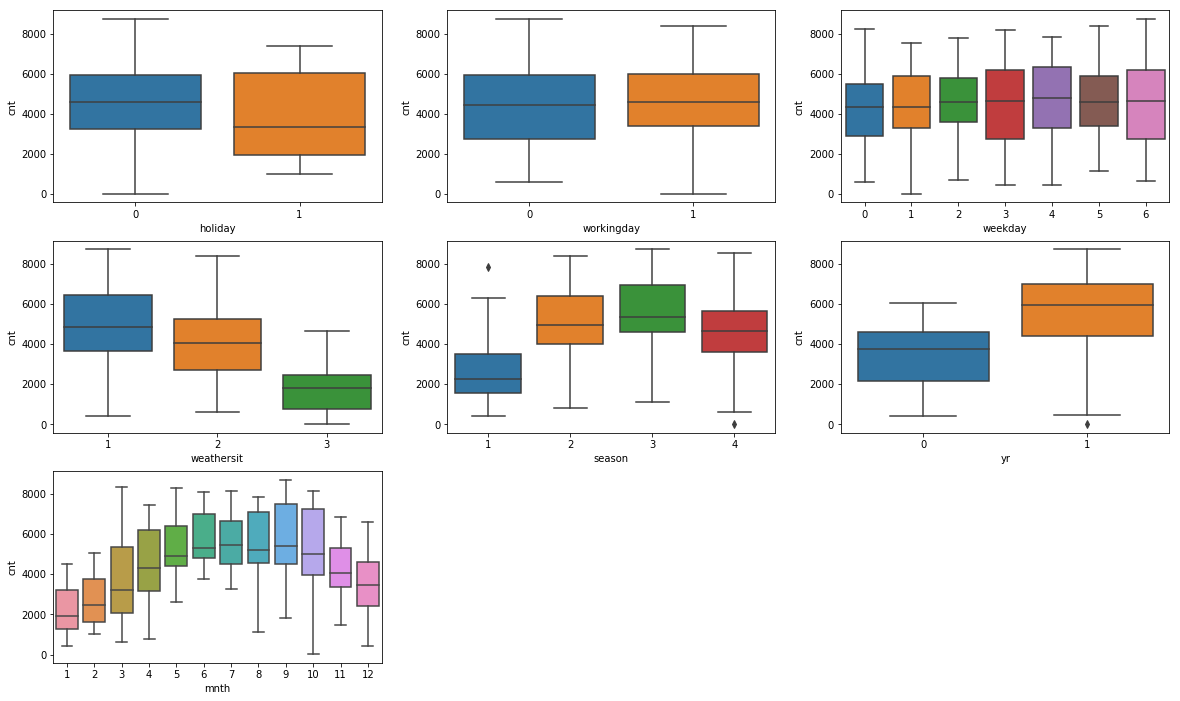

In [19]:
#Visualising Categorical Variables

plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
sns.boxplot(x='holiday', y='cnt', data=bike)

plt.subplot(3,3,2)
sns.boxplot(x='workingday', y='cnt', data=bike)

plt.subplot(3,3,3)
sns.boxplot(x='weekday', y='cnt', data=bike)

plt.subplot(3,3,4)
sns.boxplot(x='weathersit', y='cnt', data=bike)

plt.subplot(3,3,5)
sns.boxplot(x='season', y='cnt', data=bike)

plt.subplot(3,3,6)
sns.boxplot(x='yr', y='cnt', data=bike)

plt.subplot(3,3,7)
sns.boxplot(x='mnth', y='cnt', data=bike)

plt.show()

#Inference

1. Holiday/working day -  factor does not impact much on bike usage.
2. weekday - Median of people using bike on weekday is very close across all the days.
3. season - People using bike varies with season, as it can be clearly seen that the number of people uses bike during "Fall" season is more. This could be a good predictor.
4. Weathersituation - People using bike on Clear Weather day is more when compared to other weathers and also no one used bike when it rains heavily. This could also be a good predictor.
5. Year - Bike usage has increased considerably in 2019 when compared to 2018.
6. Month - There is a considerable increase in the bike usage in the months of May to October. Hence month could be good variable for prediction. Based on this we can consider month as categorical variable and can be encoded.


In [20]:
#Based on the above inference updating the month variable

bike['mnth']=bike['mnth'].astype('category')
#bike['weekday']=bike['weekday'].astype('category')
bike['weathersit'] = bike['weathersit'].astype('category')
bike['season'] = bike['season'].astype('category')
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 729
Data columns (total 12 columns):
season        728 non-null category
yr            728 non-null int64
mnth          728 non-null category
holiday       728 non-null int64
weekday       728 non-null int64
workingday    728 non-null int64
weathersit    728 non-null category
temp          728 non-null float64
atemp         728 non-null float64
hum           728 non-null float64
windspeed     728 non-null float64
cnt           728 non-null int64
dtypes: category(3), float64(4), int64(5)
memory usage: 79.7 KB


# Step 2 -  Preparing the data for Modelling

1. Encoding
    Other Categorical variable to dummy variable
2. Splitting into train and test
3. Rescaling

In [22]:
## Creating Dummy Variables
bike = pd.get_dummies(bike,drop_first = True)

In [23]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 729
Data columns (total 25 columns):
yr              728 non-null int64
holiday         728 non-null int64
weekday         728 non-null int64
workingday      728 non-null int64
temp            728 non-null float64
atemp           728 non-null float64
hum             728 non-null float64
windspeed       728 non-null float64
cnt             728 non-null int64
season_2        728 non-null uint8
season_3        728 non-null uint8
season_4        728 non-null uint8
mnth_2          728 non-null uint8
mnth_3          728 non-null uint8
mnth_4          728 non-null uint8
mnth_5          728 non-null uint8
mnth_6          728 non-null uint8
mnth_7          728 non-null uint8
mnth_8          728 non-null uint8
mnth_9          728 non-null uint8
mnth_10         728 non-null uint8
mnth_11         728 non-null uint8
mnth_12         728 non-null uint8
weathersit_2    728 non-null uint8
weathersit_3    728 non-null uint8
dtypes: floa

In [24]:
bike.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
bike.shape

(728, 25)

In [26]:
bike.columns

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weathersit_2', 'weathersit_3'],
      dtype='object')

# Splitting the data for Train and Test

    Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
    We will use train_test_split method from sklearn package for this

In [27]:
df_train,df_test = train_test_split(bike,train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(509, 25)
(219, 25)


# Rescaling the Features

In [28]:
scaler = MinMaxScaler()

scaler_vars = ['temp','atemp','windspeed','hum','cnt','weekday']


#2. Create a list of numeric variables

df_train[scaler_vars] = scaler.fit_transform(df_train[scaler_vars])

In [29]:
df_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
728,1,0,0.000000,0,0.245101,0.204242,0.319025,0.772556,0.204096,0,...,0,0,0,0,0,0,0,1,0,0
481,1,0,0.833333,1,0.496388,0.499889,0.204176,0.764739,0.714565,1,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.000000,0,0.651106,0.632534,0.774941,0.375373,0.479636,1,...,0,0,0,0,0,0,0,0,1,0
629,1,0,1.000000,0,0.736253,0.711117,0.546404,0.604317,0.963300,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,0.500000,1,0.901354,0.858965,0.470417,0.179101,0.712034,1,...,0,1,0,0,0,0,0,0,0,0


In [30]:
df_train.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,0.506876,0.031434,0.498363,0.679764,0.537164,0.521667,0.529901,0.374965,0.512550,0.245580,...,0.088409,0.076621,0.076621,0.092338,0.080550,0.084479,0.090373,0.090373,0.359528,0.031434
std,0.500445,0.174660,0.337810,0.467026,0.226375,0.215665,0.199051,0.195571,0.224155,0.430854,...,0.284168,0.266251,0.266251,0.289787,0.272411,0.278379,0.286998,0.286998,0.480334,0.174660
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.166667,0.000000,0.336479,0.328412,0.383410,0.230522,0.355844,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.500000,1.000000,0.533770,0.530326,0.527262,0.353572,0.516452,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.833333,1.000000,0.736253,0.703523,0.669954,0.487485,0.678900,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


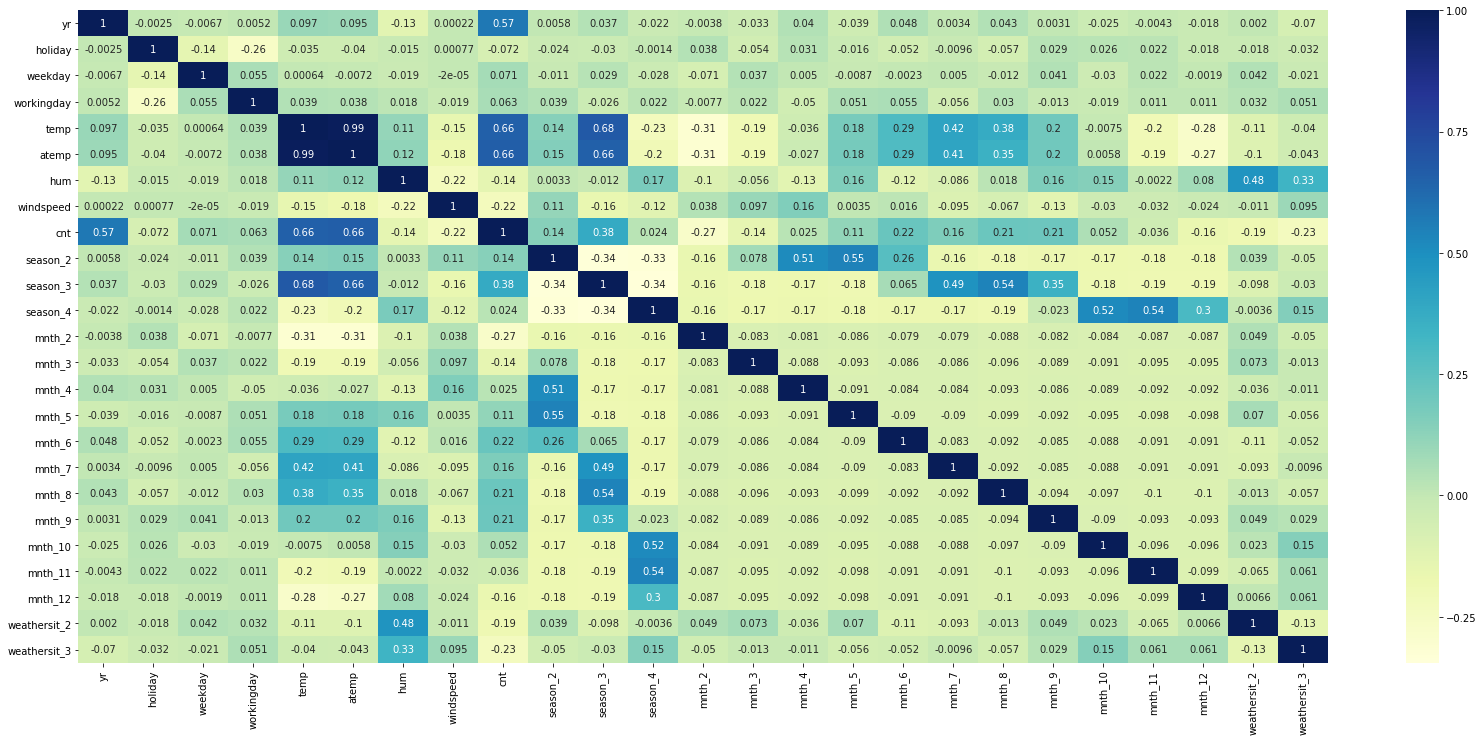

In [31]:
plt.figure(figsize = (28,12))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [32]:
df_train.columns

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

# Building the model

In [34]:
#Using RFE Automated method 

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,12)
rfe = rfe.fit(X_train,y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 2),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', False, 3),
 ('mnth_4', False, 7),
 ('mnth_5', False, 5),
 ('mnth_6', False, 6),
 ('mnth_7', False, 9),
 ('mnth_8', False, 4),
 ('mnth_9', True, 1),
 ('mnth_10', False, 8),
 ('mnth_11', False, 11),
 ('mnth_12', False, 13),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_9', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['weekday', 'workingday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12'],
      dtype='object')

In [38]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [39]:
X_train_rfe.head()

,yr,holiday,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_9,weathersit_2,weathersit_3
728,1,0,0.245101,0.204242,0.319025,0.772556,0,0,0,0,0,0
481,1,0,0.496388,0.499889,0.204176,0.764739,1,0,0,0,0,0
113,0,0,0.651106,0.632534,0.774941,0.375373,1,0,0,0,1,0
629,1,0,0.736253,0.711117,0.546404,0.604317,0,1,0,1,0,0
535,1,0,0.901354,0.858965,0.470417,0.179101,1,0,0,0,0,0


# Model Building

In [40]:
X_train_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.16e-190
Time:                        18:29:34   Log-Likelihood:                 509.26
No. Observations:                 509   AIC:                            -992.5
Df Residuals:                     496   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1789      0.020      8.736      0.000       0.139       0.219
yr               0.2227      0.008     27.188      0.000       0.207       0.239
holiday         -0.0715      0.023     -3.106      0.002      -0.117      -0.026
temp             0.4081      0.132      3.097      0.002       0.149       0.667
atemp            0.1102      0.133      0.826      0.409      -0.152       0.372
hum             -0.1429      0.029     -4.875      0.000      -0.200      -0.085
windspeed       -0.1268      0.023     -5.598      0.000      -0.171      -0.082
season_2         0.1203      0.015      8.015      0.000       0.091       0.150
season_3         0.0602      0.021      2.911      0.004       0.020       0.101
season_4         0.1564      0.013     12.145      0.000       0.131       0.182
mnth_9           0.1023      0.016      6.346      0.000       0.071       0.134
weathersit_2    -0.0460      0.011     -4.265      0.000      -0.067      -0.025
weathersit_3    -0.2200      0.027     -8.021      0.000      -0.274      -0.166
==============================================================================
Omnibus:                       84.673   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.930
Skew:                          -0.827   Prob(JB):                     6.43e-49
Kurtosis:                       5.779   Cond. No.                         76.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,temp,369.60
3,atemp,351.52
4,hum,11.39
7,season_3,6.94
5,windspeed,3.46
6,season_2,3.46
8,season_4,2.60
10,weathersit_2,2.52
0,yr,2.01
11,weathersit_3,1.36


Inference

1. atemp has high pvalue and high VIF, hence removing it first and refitting the model.

In [42]:
X_train_rfe = X_train_rfe.drop('atemp', axis=1)

In [43]:
X_train_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.56e-191
Time:                        18:29:35   Log-Likelihood:                 508.91
No. Observations:                 509   AIC:                            -993.8
Df Residuals:                     497   BIC:                            -943.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1805      0.020      8.864      0.000       0.141       0.221
yr               0.2226      0.008     27.192      0.000       0.207       0.239
holiday         -0.0722      0.023     -3.143      0.002      -0.117      -0.027
temp             0.5136      0.033     15.589      0.000       0.449       0.578
hum             -0.1418      0.029     -4.844      0.000      -0.199      -0.084
windspeed       -0.1299      0.022     -5.820      0.000      -0.174      -0.086
season_2         0.1207      0.015      8.047      0.000       0.091       0.150
season_3         0.0587      0.021      2.849      0.005       0.018       0.099
season_4         0.1572      0.013     12.246      0.000       0.132       0.182
mnth_9           0.1026      0.016      6.371      0.000       0.071       0.134
weathersit_2    -0.0462      0.011     -4.289      0.000      -0.067      -0.025
weathersit_3    -0.2209      0.027     -8.067      0.000      -0.275      -0.167
==============================================================================
Omnibus:                       84.268   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.638
Skew:                          -0.823   Prob(JB):                     7.45e-49
Kurtosis:                       5.783   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,temp,21.10
3,hum,11.21
6,season_3,6.88
5,season_2,3.46
4,windspeed,3.40
7,season_4,2.58
9,weathersit_2,2.52
0,yr,2.01
10,weathersit_3,1.36
8,mnth_9,1.31


Inference

1. hum has high VIF, hence removing it next and refitting the model. Though Hum comes second in VIF values, we had seen the collinearity between cnt and temp variable

In [45]:
X_train_rfe = X_train_rfe.drop('hum', axis=1)

In [46]:
X_train_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.57e-187
Time:                        18:29:35   Log-Likelihood:                 497.17
No. Observations:                 509   AIC:                            -972.3
Df Residuals:                     498   BIC:                            -925.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1223      0.017      7.276      0.000       0.089       0.155
yr               0.2295      0.008     27.830      0.000       0.213       0.246
holiday         -0.0734      0.023     -3.126      0.002      -0.120      -0.027
temp             0.4728      0.033     14.520      0.000       0.409       0.537
windspeed       -0.0982      0.022     -4.502      0.000      -0.141      -0.055
season_2         0.1250      0.015      8.166      0.000       0.095       0.155
season_3         0.0742      0.021      3.568      0.000       0.033       0.115
season_4         0.1538      0.013     11.738      0.000       0.128       0.180
mnth_9           0.0918      0.016      5.627      0.000       0.060       0.124
weathersit_2    -0.0782      0.009     -8.993      0.000      -0.095      -0.061
weathersit_3    -0.2876      0.024    -11.879      0.000      -0.335      -0.240
==============================================================================
Omnibus:                       79.530   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.177
Skew:                          -0.783   Prob(JB):                     1.70e-45
Kurtosis:                       5.696   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,temp,14.53
5,season_3,6.50
4,season_2,3.43
3,windspeed,3.35
6,season_4,2.51
0,yr,2.01
8,weathersit_2,1.52
7,mnth_9,1.28
9,weathersit_3,1.10
1,holiday,1.04


Inference

1. season_3 has high VIF, hence removing it next and refitting the model. Though "season_3" comes second in VIF values, we had seen the collinearity between cnt and temp variable

In [48]:
X_train_rfe = X_train_rfe.drop('season_3', axis=1)

In [49]:
X_train_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          7.96e-186
Time:                        18:29:35   Log-Likelihood:                 490.75
No. Observations:                 509   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -919.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1113      0.017      6.657      0.000       0.078       0.144
yr               0.2275      0.008     27.335      0.000       0.211       0.244
holiday         -0.0778      0.024     -3.276      0.001      -0.124      -0.031
temp             0.5655      0.020     28.492      0.000       0.526       0.604
windspeed       -0.1043      0.022     -4.742      0.000      -0.148      -0.061
season_2         0.0848      0.010      8.090      0.000       0.064       0.105
season_4         0.1252      0.010     11.935      0.000       0.105       0.146
mnth_9           0.1061      0.016      6.636      0.000       0.075       0.138
weathersit_2    -0.0790      0.009     -8.986      0.000      -0.096      -0.062
weathersit_3    -0.2832      0.024    -11.579      0.000      -0.331      -0.235
==============================================================================
Omnibus:                       72.717   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.589
Skew:                          -0.755   Prob(JB):                     2.46e-37
Kurtosis:                       5.381   Cond. No.                         9.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,temp,3.79
3,windspeed,3.16
0,yr,1.99
4,season_2,1.57
7,weathersit_2,1.51
5,season_4,1.38
6,mnth_9,1.21
8,weathersit_3,1.10
1,holiday,1.03


Now that all the p-value and VIF are well within limits and we have good R-Squared as well. Continue further with residual analysis

# Residual Analysis

In [51]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred.head()

728    0.396769
481    0.624461
113    0.446005
629    0.798155
535    0.914564
dtype: float64

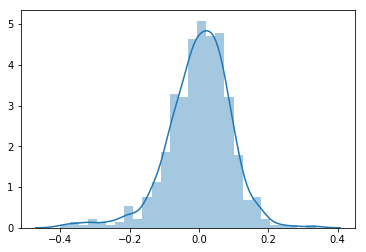

In [52]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

#Linear Regression Assumption — Normality of the residuals

Residuals are normally distributed

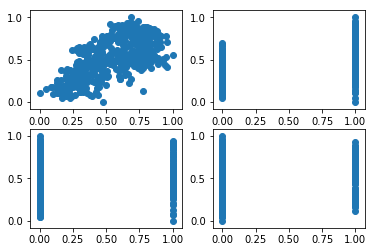

In [53]:
#Linear relationship between X and Y

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(X_train_sm['temp'], y_train)
ax2.scatter(X_train_sm['yr'], y_train)
ax3.scatter(X_train_sm['season_4'], y_train)
ax4.scatter(X_train_sm['season_2'], y_train)
plt.show()

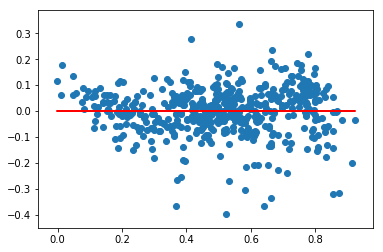

In [54]:
#look for patterns in residuals, Checking for homoscedasticity
plt.scatter(y_train_pred, res)
plt.plot(y_train_pred,[0]*len(y_train_pred),'r')
plt.show()

There is a constant variance around zero line with some outliers and no definite pattern found.

# Step 5 Predictions and Evaluations on the Test Set


In [55]:
scaler_vars = ['temp','atemp','windspeed','hum','cnt','weekday']


#2. Create a list of numeric variables

df_test[scaler_vars] = scaler.transform(df_test[scaler_vars])

In [56]:
df_test.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
241,0,0,0.333333,1,0.722754,0.689995,0.409512,0.207143,0.596180,0,...,0,0,0,1,0,0,0,0,0,0
496,1,0,1.000000,0,0.629300,0.623239,0.314965,0.202447,0.852163,1,...,1,0,0,0,0,0,0,0,0,0
449,1,0,0.166667,1,0.481850,0.481306,0.311485,0.862891,0.636908,1,...,0,0,0,0,0,0,0,0,0,0
594,1,0,1.000000,0,0.771557,0.721264,0.486078,0.339536,0.902324,0,...,0,0,0,1,0,0,0,0,0,0
151,0,0,0.500000,1,0.878510,0.858954,0.588746,0.412734,0.454671,1,...,0,1,0,0,0,0,0,0,1,0


In [57]:
df_test.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.488584,0.022831,0.499239,0.694064,0.560551,0.547691,0.503549,0.357948,0.527927,0.269406,...,0.077626,0.095890,0.105023,0.068493,0.086758,0.086758,0.063927,0.073059,0.287671,0.018265
std,0.501015,0.149707,0.326574,0.461858,0.232600,0.223886,0.182531,0.183809,0.217318,0.444668,...,0.268194,0.295115,0.307285,0.253169,0.282125,0.282125,0.245183,0.260830,0.453714,0.134214
min,0.000000,0.000000,0.000000,0.000000,0.046591,0.026455,0.070765,-0.049874,0.055683,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.166667,0.000000,0.368668,0.368525,0.351877,0.232049,0.380177,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.500000,1.000000,0.564921,0.567477,0.499999,0.336405,0.530028,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.833333,1.000000,0.774153,0.742802,0.641153,0.450008,0.685918,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.984424,1.019437,0.954151,0.951690,0.981707,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
y_test = df_test.pop('cnt')
X_test = df_test

In [59]:
X_test_sm = sm.add_constant(X_test)

In [60]:
X_test_sm = X_test_sm.drop(['atemp','hum','season_3','weekday', 'workingday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12'],axis=1)

In [61]:
#predict
y_test_pred = lr_model.predict(X_test_sm)

In [62]:
#Evaluate
r2_score(y_true = y_test, y_pred=y_test_pred)

0.7872575607327361

Text(0, 0.5, 'y_pred')

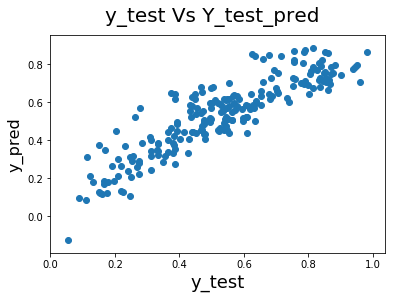

In [63]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test Vs Y_test_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [64]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_test_pred))

Coefficient of determination: 0.79


We can see that equation of our best fitted model is:

y = 0.2275 * yr - 0.0778 * holiday + 0.5655 * temp - 0.1043 * windspeed + 0.0848 * season_2 + 0.1252 * season4 + 0.1061 * mnth_9 - 0.0790 * weathersit_2 - 0.2832 * weathersit_3

# Summary    

1. There were around 730 records were present in the dataset
2. Few of the below variables are removed as they are not adding any value to the model
    Casual/Registered - since we have this information as total to be predictive variable
    instant - since its an index, we can remove tis field as well
    dteday - since we have this information as individual fields, we can remove this field and also date cannot be used for linear regression models.
3. Exploaratory Data Analysis performed. (Univaritate, Bivariate Analysis)
4. Few of the outliers present in "humidity" were removed based on the analysis using IQR method.
5. Performed encoding and added dummy to the categorical variables.
6. Scaled all the variabled using Min-Max scaler.
7. Split the dataset into train and test
7. Using RFE, identified required variables for model building and fitting.
8. Removed certain variables based on P-Value and VIF.
9. Predicted and looked for residual errors. 
10. Assumptions of residual errors are verified.


# Conclusion

Below are the strong indicators for the model that provide a positive impact.
1. temp
2. season
3. year (could be due to people are more towards health consious)